In [ ]:
def prune(input_list):
    l = []

    for e in input_list:
        e = e.strip() # remove the leading and trailing characters, here space
        if e != '' and e != ' ':
            l.append(e)

    return l

In [2]:
def result_plot(file=None):
    hub_acc_list = []
    fxp_acc_list = []
    csv_file = open(file, 'r')
    first = True
    for row in csv_file:
        if first is True:
            first = False
            continue
            
        elems = row.strip().split(',')
        elems = prune(elems)
        hub_acc_list.append(float(elems[1]))
        fxp_acc_list.append(float(elems[3]))
    csv_file.close()
    return hub_acc_list, fxp_acc_list

In [3]:
convnet_mnist_hub_acc, convnet_mnist_fxp_acc = result_plot(file="../convnet_mnist/convnet_mnist_result.csv")
del convnet_mnist_hub_acc[-2]
del convnet_mnist_fxp_acc[-2]

print(convnet_mnist_hub_acc)
print(convnet_mnist_fxp_acc)

[98.94, 98.98, 99.03, 99.07, 99.06, 99.07, 99.04, 99.17]
[99.02, 99.02, 99.04, 99.04, 99.04, 99.04, 99.04, 99.17]


In [4]:
resnet18_cifar10_hub_acc, resnet18_cifar10_fxp_acc = result_plot(file="../resnet18_cifar10/resnet18_cifar10_result.csv")
del resnet18_cifar10_hub_acc[-2]
del resnet18_cifar10_fxp_acc[-2]

print(resnet18_cifar10_hub_acc)
print(resnet18_cifar10_fxp_acc)

[19.5, 77.44, 92.31, 94.39, 94.6, 94.7, 94.77, 95.38]
[94.52, 94.78, 94.78, 94.77, 94.79, 94.81, 94.8, 95.38]


In [5]:
alexnet_imagenet_hub_acc, alexnet_imagenet_fxp_acc = result_plot(file="../alexnet_imagenet/alexnet_imagenet_result.csv")
del alexnet_imagenet_hub_acc[-2]
del alexnet_imagenet_fxp_acc[-2]

print(alexnet_imagenet_hub_acc)
print(alexnet_imagenet_fxp_acc)

[0.13, 0.24, 2.474, 21.672, 42.438, 50.402, 53.452, 56.55]
[48.66, 53.656, 54.694, 54.772, 54.932, 54.962, 54.976, 56.55]


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

font = {'family':'Times New Roman', 'size': 6}

matplotlib.rc('font', **font)

In [7]:
def autolabel(rects, data):
    """Attach a text label above each bar in *rects*, displaying its height."""
    mean = np.mean(np.array(data))
    for rect in rects:
        height = rect.get_height()
        if height < mean - 5:
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [8]:
my_dpi = 300
fig_h = 1.1
fig_w = 3.3115

95 100


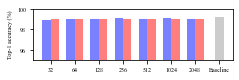

In [9]:
labels = ['32', '64', '128', '256', '512', '1024', '2048']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
data1 = convnet_mnist_hub_acc[0:len(convnet_mnist_hub_acc)-1]
data2 = convnet_mnist_fxp_acc[0:len(convnet_mnist_fxp_acc)-1]
data3 = convnet_mnist_fxp_acc[-1]

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
rects1 = ax.bar(x-width/2, data1, width, color="#7A81FF")
rects2 = ax.bar(x+width/2, data2, width, color="#FF7F7F")
rects3 = ax.bar([x[-1]+1], data3, width, color="#CCCCCC")

x = np.append(x, x[-1]+1)
labels.append('Baseline')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min(data1) / 5) * 5)
top = int(math.ceil( max(data2) / 5) * 5)
print(bot, top)
ax.set_ylim(bot, top)
ax.set_yticks([96, 98, 100])
ax.set_yticklabels([96, 98, 100])

autolabel(rects1, data3)
autolabel(rects2, data3)
autolabel(rects3, data3)

fig.tight_layout()
plt.show()
fig.savefig("convnet_mnist_acc.pdf", bbox_inches='tight', dpi=my_dpi)

15 95


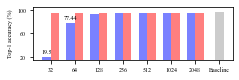

In [10]:
labels = ['32', '64', '128', '256', '512', '1024', '2048']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
data1 = resnet18_cifar10_hub_acc[0:len(resnet18_cifar10_hub_acc)-1]
data2 = resnet18_cifar10_fxp_acc[0:len(resnet18_cifar10_fxp_acc)-1]
data3 = resnet18_cifar10_fxp_acc[-1]

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
rects1 = ax.bar(x-width/2, data1, width, color="#7A81FF")
rects2 = ax.bar(x+width/2, data2, width, color="#FF7F7F")
rects3 = ax.bar([x[-1]+1], data3, width, color="#CCCCCC")

x = np.append(x, x[-1]+1)
labels.append('Baseline')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min(data1) / 5) * 5)
top = int(math.ceil( max(data2) / 5) * 5)
print(bot, top)
ax.set_ylim(bot, top+10)
ax.set_yticks([20, 60, 100])
ax.set_yticklabels([20, 60, 100])

autolabel(rects1, data3)
autolabel(rects2, data3)
autolabel(rects3, data3)

fig.tight_layout()
plt.show()
fig.savefig("resnet18_cifar10_acc.pdf", bbox_inches='tight', dpi=my_dpi)

0 55


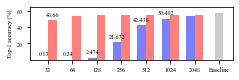

In [11]:
labels = ['32', '64', '128', '256', '512', '1024', '2048']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
data1 = alexnet_imagenet_hub_acc[0:len(alexnet_imagenet_hub_acc)-1]
data2 = alexnet_imagenet_fxp_acc[0:len(alexnet_imagenet_fxp_acc)-1]
data3 = alexnet_imagenet_fxp_acc[-1]

fig, ax = plt.subplots(figsize=(fig_w, fig_h))
rects1 = ax.bar(x-width/2, data1, width, color="#7A81FF")
rects2 = ax.bar(x+width/2, data2, width, color="#FF7F7F")
rects3 = ax.bar([x[-1]+1], data3, width, color="#CCCCCC")

x = np.append(x, x[-1]+1)
labels.append('Baseline')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min(data1) / 5) * 5)
top = int(math.ceil( max(data2) / 5) * 5)
print(bot, top)
ax.set_ylim(bot, top+10)
ax.set_yticks([20, 40, 60])
ax.set_yticklabels([20, 40, 60])

autolabel(rects1, data3)
autolabel(rects2, data3)
autolabel(rects3, data3)

fig.tight_layout()
plt.show()
fig.savefig("alexnet_imagenet_acc.pdf", bbox_inches='tight', dpi=my_dpi)